#imolecule in the IPython notebook

I created imolecule to fix a deficiency in my workflow. While my chemical simulations were entirely in notebooks, I had to use external programs like mercury to visually debug chemical structures. Mercury is a good program, but dropping out of the notebook felt clumsy and made my work less reproducible.

This is my solution. It's a short javascript file that makes heavy use of three.js to render 3D shapes in webGL. This code is connected to the notebook with a simple Python API, and can be used like so:

In [1]:
import imolecule
imolecule.draw("CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C")

It can also load files directly, automatically using the file extension to determine format.

In [2]:
imolecule.draw("data/NaX.cif")

When viewing crystal pores, you usually want to use an orthographic camera and a space-filling model. You may also want to use a more standard shading, and make the initial window size bigger for static viewing.

In [3]:
import imolecule
imolecule.draw("data/NaX.cif", drawing_type="space filling", shader="lambert", camera_type="orthographic", size=(800, 600))

Read the docs for more.

In [4]:
help(imolecule.draw)

Help on function draw in module imolecule.notebook:

draw(data, format='auto', size=(400, 300), drawing_type='ball and stick', camera_type='perspective', shader='toon')
    Draws an interactive 3D visualization of the inputted chemical.
    
    Args:
        data: A string or file representing a chemical.
        format: The format of the `data` variable (default is "auto").
        size: Starting dimensions of visualization, in pixels.
        drawing_type: Specifies the molecular representation. Can be "ball and
            stick", "wireframe", or "space filling".
        camera_type: Can be "perspective" or "orthographic".
        shader: Specifies shading algorithm to use. Can be "toon", "basic",
            "phong", or "lambert".
    
    The `format` can be any value specified by Open Babel
    (http://openbabel.org/docs/2.3.1/FileFormats/Overview.html). The "auto"
    option uses the extension for files (ie. my_file.mol -> mol) and defaults
    to SMILES (smi) for strings.



If you use open babel, you may already have imolecule! It has been in the development version of open babel since September 2013. Set the `pybel.ipython_3d` variable to True, and open babel will render your molecules.

In [5]:
import pybel
pybel.ipython_3d = True
sarin = pybel.readstring("smi", "CCOP(=O)(C)SCCN(C(C)C)C(C)C")
sarin

If you use RDKit, you may also have imolecule! The code has been in RDKit since May 2014.

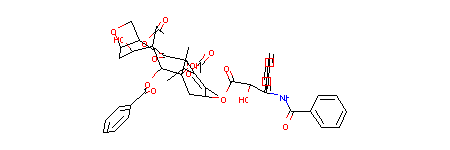

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True

mol = Chem.MolFromSmiles("CC(=O)OC1C2=C(C)C(CC(O)(C(OC(=O)c3ccccc3)C4C5(COC5CC(O)C4(C)C1=O)"
                         "OC(=O)C)C2(C)C)OC(=O)C(O)C(NC(=O)c6ccccc6)c7ccccc7")
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)
mol